In [109]:
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

numpy version	: 1.16.2
pandas version	: 0.23.4
seaborn version	: 0.9.0


In [110]:
loan=pd.read_excel('C:/Users/Lenovo/Desktop/codes n/loan.xlsx')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,0.1065,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,1985-01-01,1,nan,nan,3,0,13648,0.8370,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,2015-01-01,171.6200,NaT,2016-05-01,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.0000,60 months,0.1527,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,1999-04-01,5,nan,nan,3,0,1687,0.0940,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,2013-04-01,119.6600,NaT,2013-09-01,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.0000,36 months,0.1596,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,2001-11-01,2,nan,nan,2,0,2956,0.9850,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,2014-06-01,649.9100,NaT,2016-05-01,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.0000,36 months,0.1349,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,1996-02-01,1,35.0000,nan,10,0,5598,0.2100,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,2015-01-01,357.4800,NaT,2016-04-01,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.0000

SO WE WILL START WITH THE EDA FOR LOAN ANALYSIS

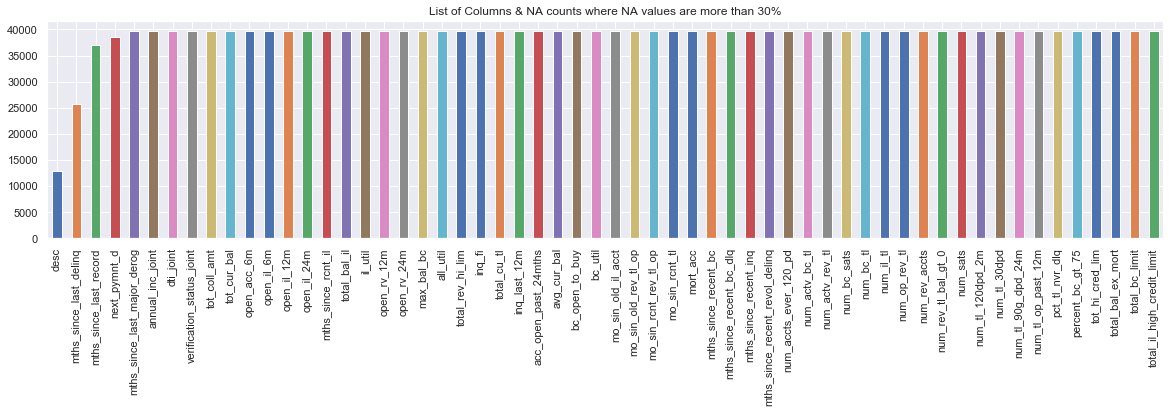

In [111]:
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [112]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [113]:
loan = removeNulls(loan, axis =1,percent = 0.3)

Number of Columns dropped	:  58

Old dataset rows,columns (39717, 111) 
New dataset rows,columns (39717, 53)


THIS IS DONE TO REMOVE COLUMNS THAT CONTAIN MORE THAN 30% DATA AS NULLs

In [114]:
loan = removeNulls(loan, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (39717, 53) 
New dataset rows,columns (39717, 53)


In [115]:
unique = loan.nunique()
unique = unique[unique.values == 1]

In [116]:
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 44) rows & columns.


SOME MORE COLUMNS ARE ELIMINATED BECAUSE OF NOT UNIQUE VALUES

In [117]:
print(loan.emp_length.unique())
loan.emp_length.fillna('0',inplace=True)
loan.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [118]:
not_required_columns = ["id","member_id","url","zip_code"]
loan.drop(labels = not_required_columns, axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 40) rows & columns.


In [119]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

REMOVING IRRELEVENT DATA

In [120]:
loan.tail(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39714,5000,5000,1325.0000,36 months,0.0807,156.8400,A,A4,NaN,< 1 year,MORTGAGE,100000.0000,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MBA Loan Consolidation,MA,2.3000,0,1998-10-01,0,11,0,9698,0.1940,20,0.0000,0.0000,5272.1611,1397.1200,5000.0000,272.1600,0.0000,0.0000,0.0000,2008-04-01,0.0000,2007-06-01,nan
39715,5000,5000,650.0000,36 months,0.0743,155.3800,A,A2,NaN,< 1 year,MORTGAGE,200000.0000,Not Verified,2007-07-01,Fully Paid,other,JAL Loan,MD,3.7200,0,1988-11-01,0,17,0,85607,0.0070,26,0.0000,0.0000,5174.1986,672.6600,5000.0000,174.2000,0.0000,0.0000,0.0000,2008-01-01,0.0000,2007-06-01,nan
39716,7500,7500,800.0000,36 months,0.1375,255.4300,E,E2,Evergreen Center,< 1 year,OWN,22000.0000,Not Verified,2007-06-01,Fully Paid,debt_consolidation,Consolidation Loan,MA,14.2900,1,2003-10-01,0,7,0,4175,0.5150,8,0.0000,0.0000,9195.2633,980.8300,7500.0000,1695.2600,0.0000,0.0000,0.0000,2010-06-01,256.5900,2010-06-01,nan


In [121]:
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation   46.9346
credit_card          12.9164
other                10.0536
home_improvement      7.4930
major_purchase        5.5065
small_business        4.6026
car                   3.9001
wedding               2.3844
medical               1.7448
moving                1.4679
house                 0.9593
vacation              0.9593
educational           0.8183
renewable_energy      0.2593
Name: purpose, dtype: float64

In [122]:
del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

print(loan.purpose.unique())

So now we are left with (35621, 40) rows & columns.
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational']


In [123]:
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid    83.1953
Charged Off   13.9665
Current        2.8382
Name: loan_status, dtype: float64

In [124]:
del_loan_status = (loan.loan_status.value_counts()*100)/len(loan)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]

loan.drop(labels = loan[loan.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

print(loan.loan_status.unique())

So now we are left with (35621, 40) rows & columns.
['Fully Paid' 'Charged Off' 'Current']


In [125]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

In [24]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_income_ratio
0,5000,5000,4975.0000,36 months,0.1065,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.6500,0,1985-01-01,1,3,0,13648,0.8370,9,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,2015-01-01,171.6200,2016-05-01,0.0000,0.2083
1,2500,2500,2500.0000,60 months,0.1527,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.0000,0,1999-04-01,5,3,0,1687,0.0940,4,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,2013-04-01,119.6600,2013-09-01,0.0000,0.0833
2,2400,2400,2400.0000,36 months,0.1596,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.7200,0,2001-11-01,2,2,0,2956,0.9850,10,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,2014-06-01,649.9100,2016-05-01,0.0000,0.1959
5,5000,5000,5000.0000,36 months,0.0790,156.4600,A,A4,Veolia Transportaton,3 years,RENT,36000.0000,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.2000,0,2004-11-01,3,9,0,7963,0.2830,12,0.0000,0.0000,5632.2100,5632.2100,5000.0000,632.2100,0.0000,0.0000,0.0000,2015-01-01,161.0300,2016-01-01,0.0000,0.1389
6,7000,7000,7000.0000,60 months,0.1596,170.0800,C,C5,Southern Star Photography,8 years,RENT,47004.0000,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.5100,0,2005-07-01,1,7,0,17726,0.8560,11,0.0000,0.0000,10110.8400,10110.8400,6985.6100,3125.2300,0.0000,0.0000,0.0000,2016-05-01,1313.7600,2016-05-01,0.0000,0.1489
7,3000,3000,3000.0000,36 months,0.1864,109.4300,E,E1,MKC Accounting,9 years,RENT,48000.0000,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,CA,5.3500,0,2007-01-01,2,4,0,8221,0.8750,4,0.0000,0.0000,3939.1353,3939.1400,3000.0000,939.1400,0.0000,0.0000,0.0000,2015-01-01,111.3400,2014-12-01,0.0000,0.0625
8,5600,5600,5600.0000,60 months,0.2128,152.3900,F,F2,NaN,4 years,OWN,40000.0000,Source Verified,2011-12-01,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.5500,0,2004-04-01,2,11,0,5210,0.3260,13,0.0000,0.0000,646.0200,646.0200,162.0200,294.9400,0.0000,189.0600,2.0900,2012-04-01,152.3900,2012-08-01,0.0000,0.1400
10,6500,6500,6500.0000,60 months,0.1465,153.4500,C,C3,Southwest Rural metro,5 years,OWN,72000.0000,Not Verified,2011-12-01,Fully Paid,debt_consolidation,High intrest Consolidation,AZ,16.1200,0,1998-01-01,2,14,0,4032,0.2060,23,0.0000,0.0000,7678.0177,7678.0200,6500.0000,1178.0200,0.0000,0.0000,0.0000,2013-06-01,1655.5400,2015-12-01,0.0000,0.0903
11,12000,12000,12000.0000,36 months,0.1269,402.5400,B,B5,UCLA,10+ years,OWN,75000.0000,Source Verified,2011-12-01,Fully Paid,debt_consolidation,Consolidation,CA,10.7800,0,1989-10-01,0,12,0,23336,0.6710,34,0.0000,0.0000,13947.9892,13947.9900,12000.0000,1947.9900,0.0000,0.0000,0.0000,2013-09-01,6315.3000,2013-08-01,0.0000,0.1600
12,9000,9000,9000.0000,36 months,0.1349,305.3800,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0000,Source Verified,2011-12-01,Charged Off,debt_consolidation,freedom,VA,10.0800,0,2004-04-01,1,4,0,10452,0.9170,9,0.0000,0.0000,2270.7000,2270.7000,1256.1400,570.2600,0.0000,444.3000,4.1600,2012-07-01,305.3800,2012-11-01,0.0000,0.3000


In [126]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [127]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [128]:
bins = [0, .075, .10, .125, .15,.20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

CREATING BINS FOR EASE OF PLOTTING

STARTING WITH UNIVARIATE ANALYSIS


Continuous Variables

In case of continuous variables, we need to understand the CENTRAL TENDENCY and SPREAD of the variable.
These are measured using various statistical metrics visualization methods such as 
BOXPLOT,HISTOGRAM/DISTRIBUTION PLOT, VIOLIN PLOT etc.
Categorical Variables

For categorical variables, we’ll use frequency table to understand distribution of each category. 
It can be be measured using two metrics, COUNT and COUNT% against each category.
COUNTBARPLOT or BAR CHART can be used as visualization.


In [130]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

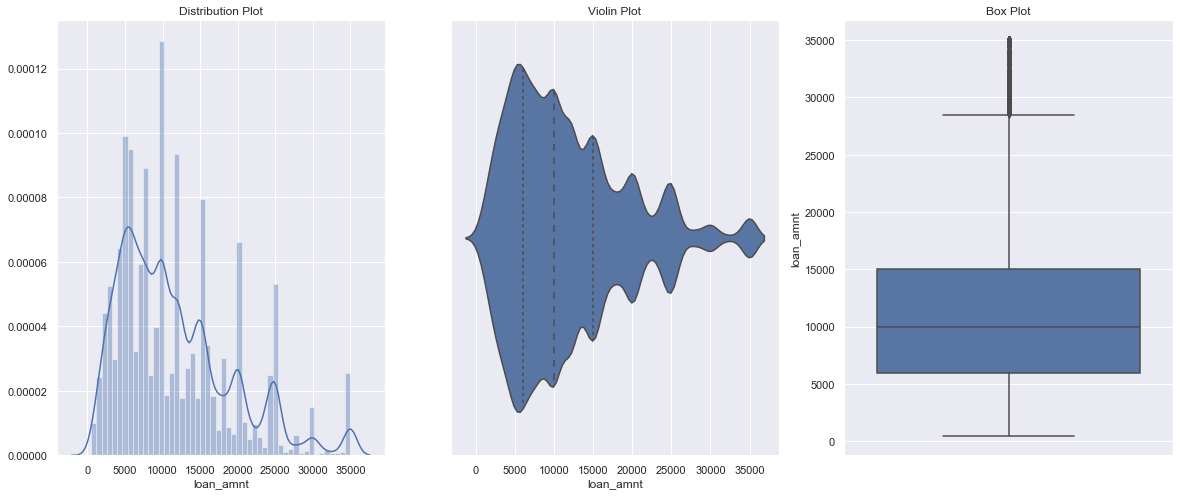

In [81]:
univariate(df=loan,col='loan_amnt',vartype=0)

Inference: Most of the loan amounts are distributed between 6000 to 15000

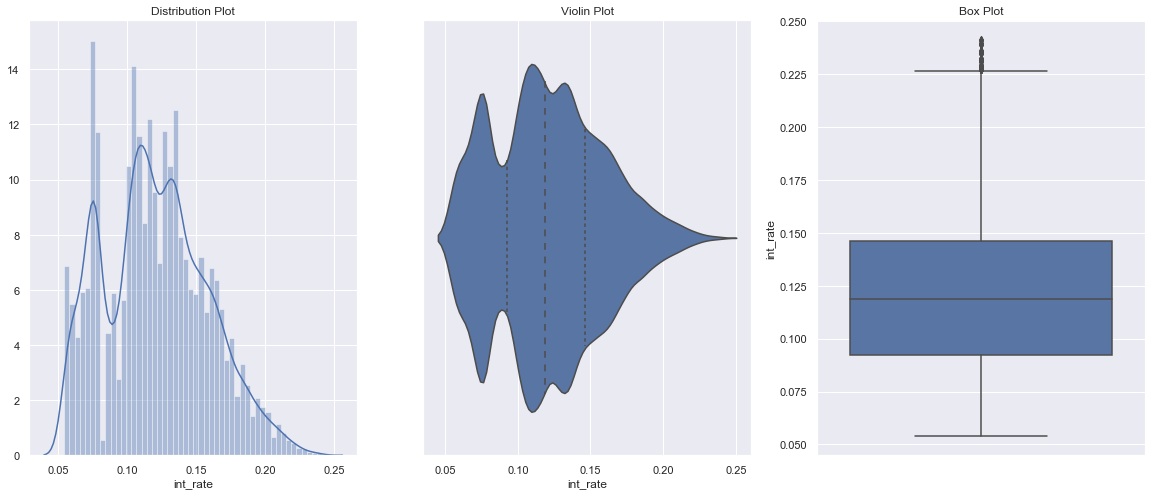

In [85]:
univariate(df=loan,col='int_rate',vartype=0)

Inference: Most of the loans interest rates are distributed between 9.5% to 14.5%.

In [56]:
loan["annual_inc"].describe()

count     35621.0000
mean      69596.8782
std       65009.9829
min        4000.0000
25%       41600.0000
50%       60000.0000
75%       83004.0000
max     6000000.0000
Name: annual_inc, dtype: float64

In [57]:
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < q]
loan["annual_inc"].describe()

count    35417.0000
mean     66946.7615
std      37318.4688
min       4000.0000
25%      41325.0000
50%      60000.0000
75%      82140.0000
max     294000.0000
Name: annual_inc, dtype: float64

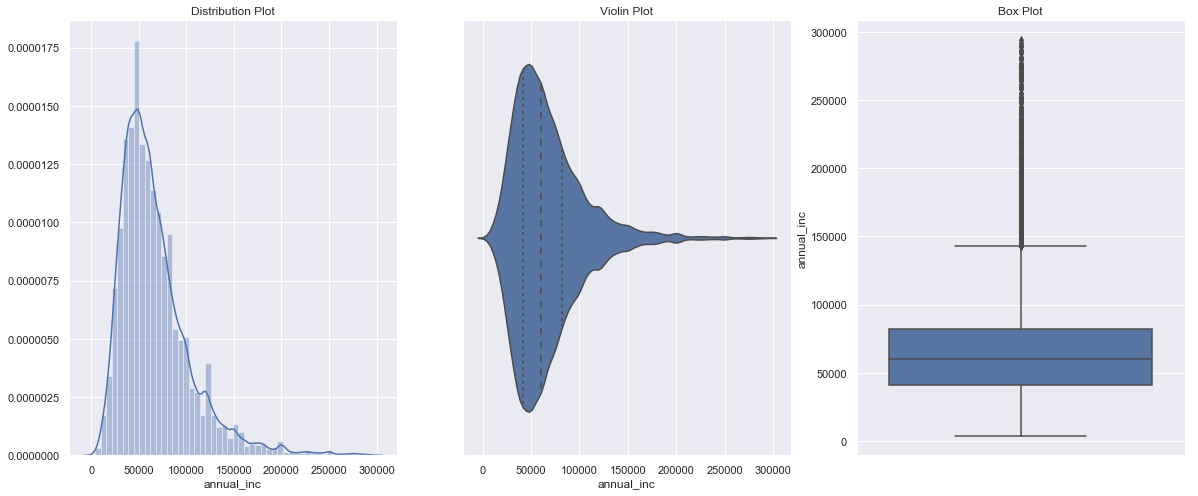

In [58]:
univariate(df=loan,col='annual_inc',vartype=0)

Most of the applicants earns beteen 48000 to 85000 annually.

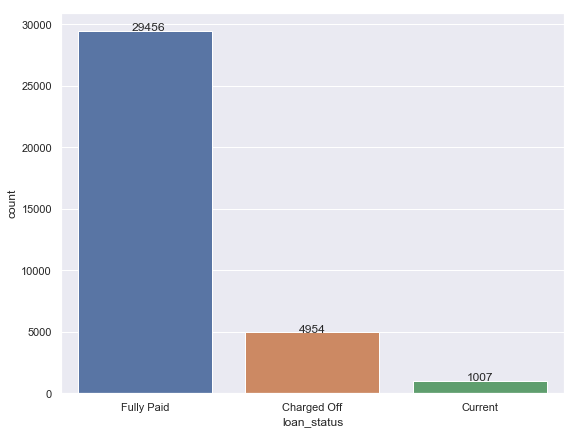

In [59]:
univariate(df=loan,col='loan_status',vartype=1)

15% of the applicants Charged off

In [61]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [62]:
rem = ['OTHER', 'NONE', 'ANY']
loan.drop(loan[loan['home_ownership'].isin(rem)].index,inplace=True)
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

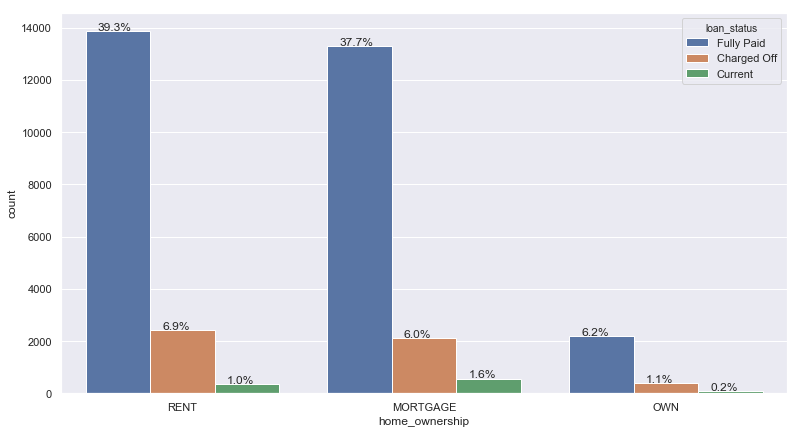

In [63]:
univariate(df=loan,col='home_ownership',vartype=1,hue='loan_status')

47% of applicants are living in rented home whereas 45.3% applicants were mortagaged their home 
and 7.5% in their own

Bivariate/Multivariate Analysis

Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.
We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. 
The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.


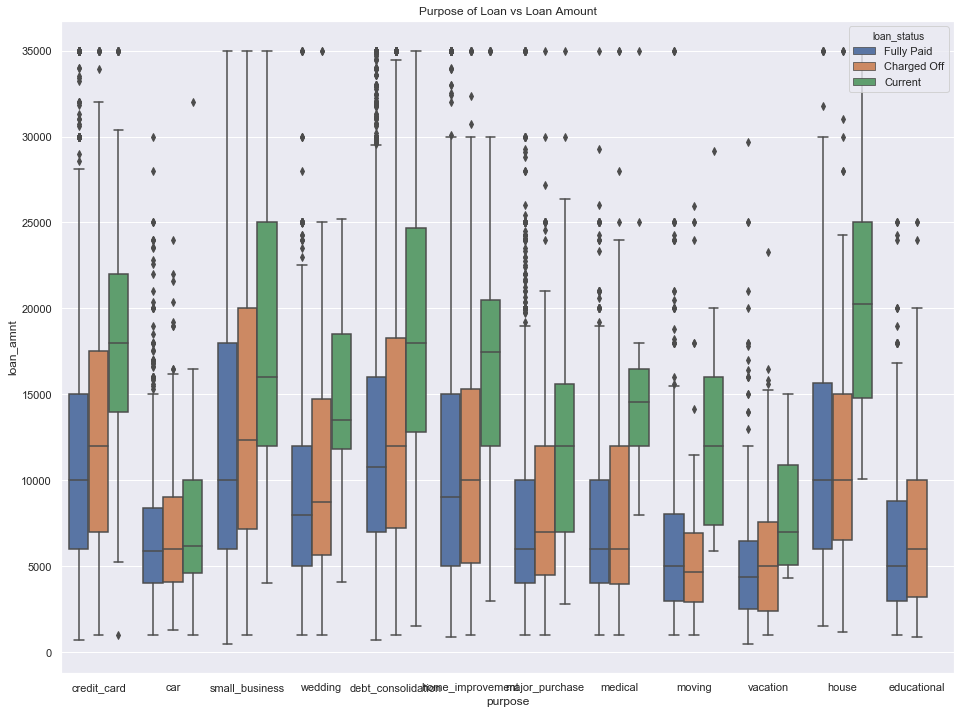

In [66]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [67]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_income_ratio
loan_amnt,1.0000,0.9811,0.9396,0.3194,0.9272,0.4184,0.0756,-0.0321,0.0062,0.1697,-0.0552,0.3208,0.0780,0.2522,0.1944,0.1941,0.8828,0.8509,0.8462,0.7269,0.0540,0.1369,0.0736,0.4412,-0.0414,0.6130
funded_amnt,0.9811,1.0000,0.9582,0.3233,0.9540,0.4139,0.0752,-0.0323,0.0071,0.1679,-0.0557,0.3137,0.0821,0.2458,0.1961,0.1958,0.8995,0.8674,0.8646,0.7348,0.0566,0.1377,0.0756,0.4456,-0.0422,0.6008
funded_amnt_inv,0.9396,0.9582,1.0000,0.3164,0.9026,0.3961,0.0819,-0.0384,-0.0072,0.1549,-0.0555,0.2933,0.0852,0.2372,0.2044,0.2044,0.8780,0.9101,0.8409,0.7279,0.0357,0.1248,0.0608,0.4365,-0.0455,0.5721
int_rate,0.3194,0.3233,0.3164,1.0000,0.2917,0.0810,0.1151,0.1556,0.1343,0.0144,0.0993,0.1006,0.4715,-0.0399,0.1349,0.1349,0.3175,0.3123,0.1929,0.5389,0.0970,0.1248,0.0690,0.1602,0.0846,0.2235
installment,0.9272,0.9540,0.9026,0.2917,1.0000,0.4184,0.0625,-0.0193,0.0069,0.1654,-0.0495,0.3160,0.1090,0.2250,0.1253,0.1251,0.8517,0.8124,0.8448,0.6287,0.0660,0.1190,0.0766,0.3927,-0.0372,0.5486
annual_inc,0.4184,0.4139,0.3961,0.0810,0.4184,1.0000,-0.1256,0.0292,0.0419,0.2492,-0.0221,0.4217,0.0353,0.3645,0.0590,0.0588,0.3975,0.3823,0.4004,0.2826,0.0204,0.0358,0.0218,0.2168,-0.0210,-0.3198
dti,0.0756,0.0752,0.0819,0.1151,0.0625,-0.1256,1.0000,-0.0371,-0.0013,0.2891,-0.0092,0.2363,0.2786,0.2302,0.0380,0.0379,0.0750,0.0804,0.0511,0.1139,-0.0113,0.0247,0.0106,0.0111,0.0022,0.1546
delinq_2yrs,-0.0321,-0.0323,-0.0384,0.1556,-0.0193,0.0292,-0.0371,1.0000,0.0081,0.0109,0.0072,-0.0578,-0.0420,0.0632,-0.0021,-0.0024,-0.0227,-0.0294,-0.0394,0.0242,0.0347,0.0120,0.0147,-0.0148,0.0037,-0.0616
inq_last_6mths,0.0062,0.0071,-0.0072,0.1343,0.0069,0.0419,-0.0013,0.0081,1.0000,0.0932,0.0249,-0.0224,-0.0691,0.1134,-0.0105,-0.0101,-0.0130,-0.0222,-0.0272,0.0224,0.0308,0.0210,0.0140,0.0259,0.0158,-0.0297
open_acc,0.1697,0.1679,0.1549,0.0144,0.1654,0.2492,0.2891,0.0109,0.0932,1.0000,0.0030,0.2850,-0.0958,0.6829,0.0269,0.0267,0.1557,0.1455,0.1539,0.1180,-0.0147,0.0165,0.0062,0.0755,0.0078,-0.0458


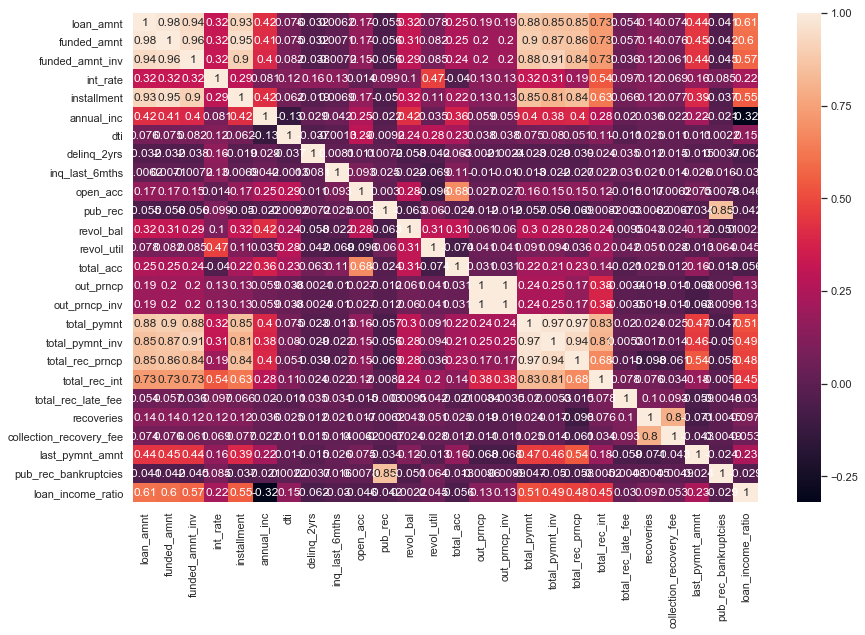

In [68]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.
So we can take any one column out of them for our analysis

In [69]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

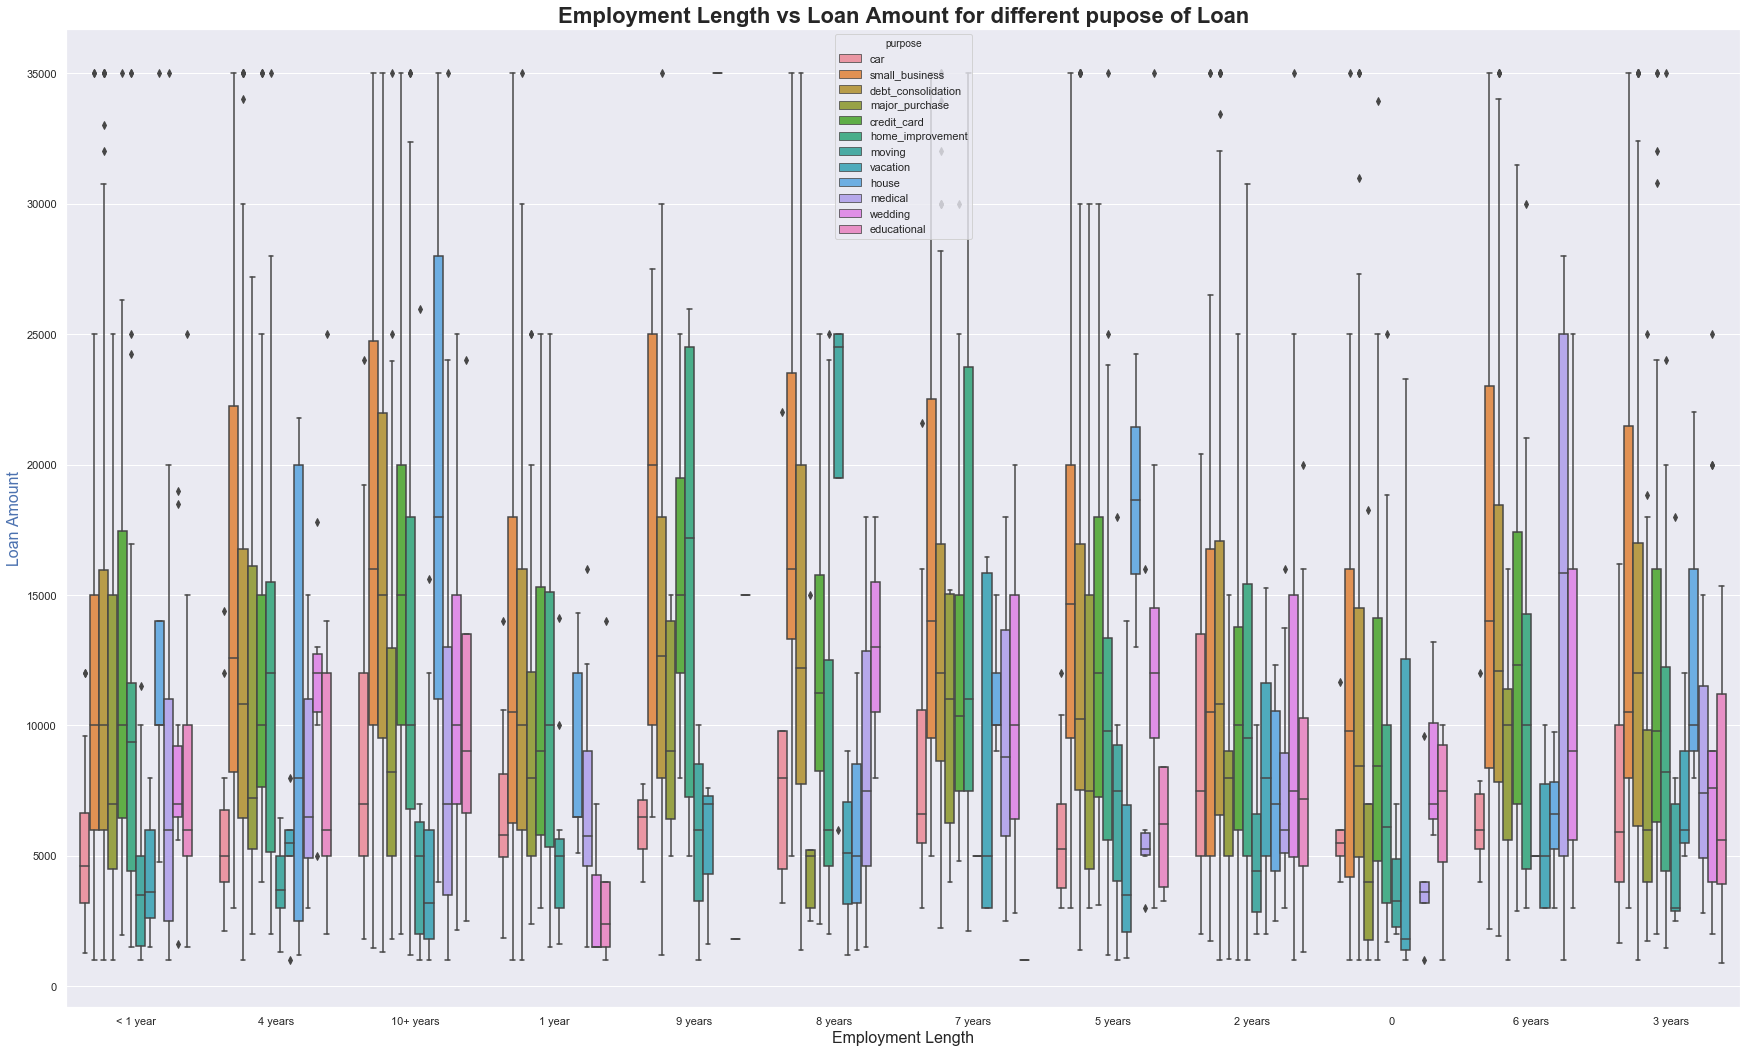

In [70]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

In [71]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

Bivariate/Multivariate Analysis with Probability of Charge off
Categorical Variables vs Probability of Charged Off

The main motive of this use case to find what parameters are impacting the most on Loan Status 
that is if a applicant will successfully complete the loan term or will charge off.

So we will be using a new term now Probability of Charged Off that will be equal to :

ProbabilityofChargedOff=Number of Applicants who charged off / TotalNo.ofApplicants

We will calculate this probability w.r.t each column in bivariate analysis & will see how the 
Probability of Charged Off changes with these columns.

We will create a user defined function for this

In [72]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [73]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NJ,254,53,1343,1650,0.1540
NM,30,4,140,174,0.1720
NV,90,15,330,435,0.2070
NY,428,95,2801,3324,0.1290
OH,138,41,928,1107,0.1250
OK,35,11,218,264,0.1330
OR,68,14,330,412,0.1650
PA,157,49,1131,1337,0.1170
RI,24,4,142,170,0.1410


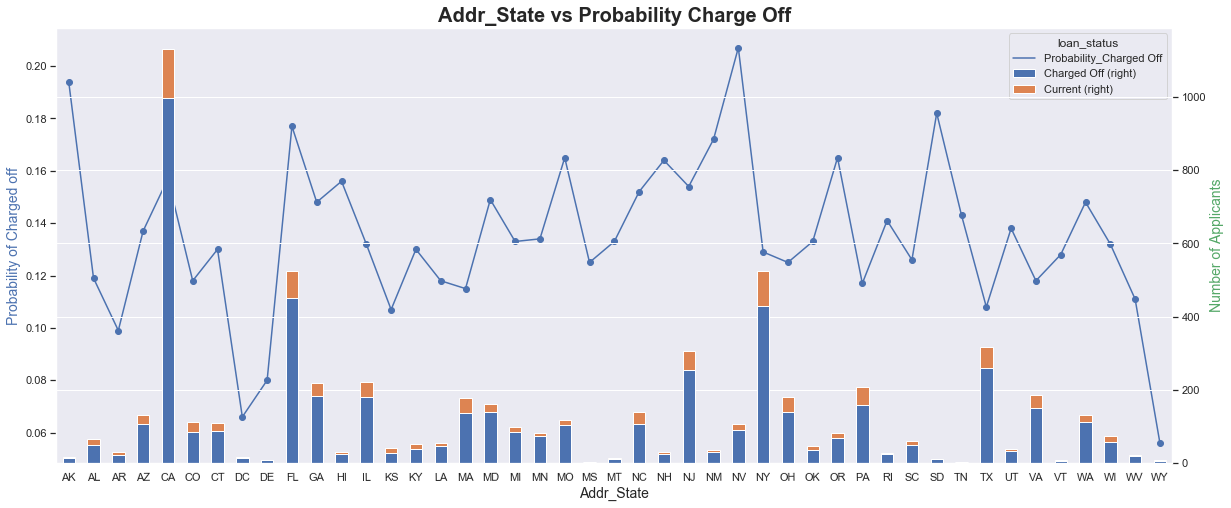

In [74]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

There are multiple States/Provinces with high probability of charge,highest being 'NV' at 20%

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,159,50,1336,1545,0.1030
credit_card,539,103,4457,5099,0.1060
debt_consolidation,2753,585,15181,18519,0.1490
educational,56,0,265,321,0.1740
home_improvement,340,99,2479,2918,0.1170
house,59,14,301,374,0.1580
major_purchase,220,37,1912,2169,0.1010
medical,106,12,568,686,0.1550
moving,90,7,480,577,0.1560


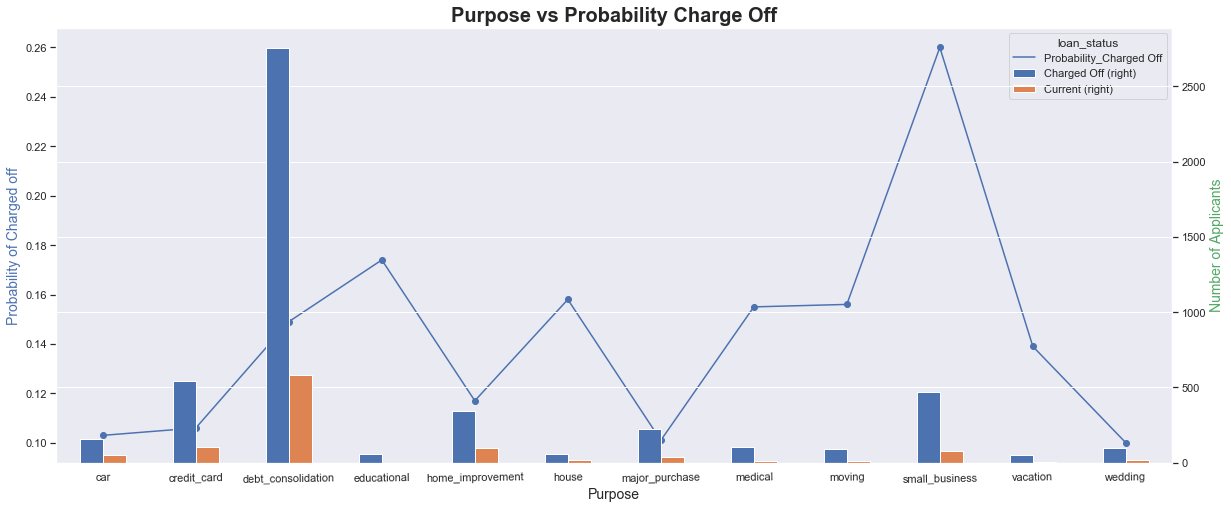

In [75]:
purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False)

Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of 26%.
So bank should take extra caution like take some asset or guarentee 
while approving the loan for purpose of 'small business'

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,512,31,8369,8912,0.0570
B,1244,303,9144,10691,0.1160
C,1167,240,5762,7169,0.1630
D,987,195,3567,4749,0.2080
E,645,161,1771,2577,0.2500
F,294,63,593,950,0.3090
G,89,14,181,284,0.3130


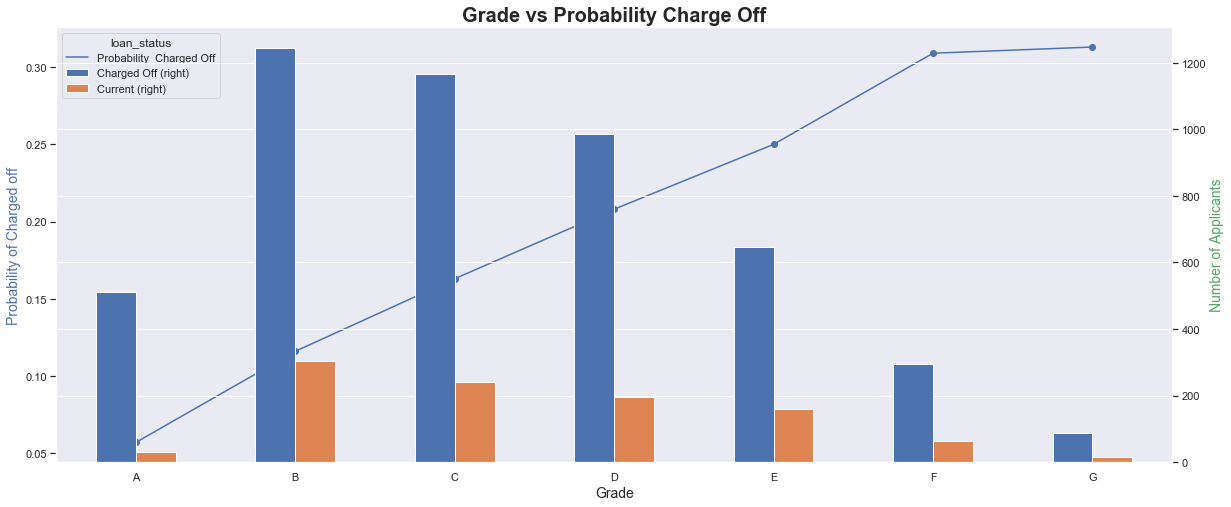

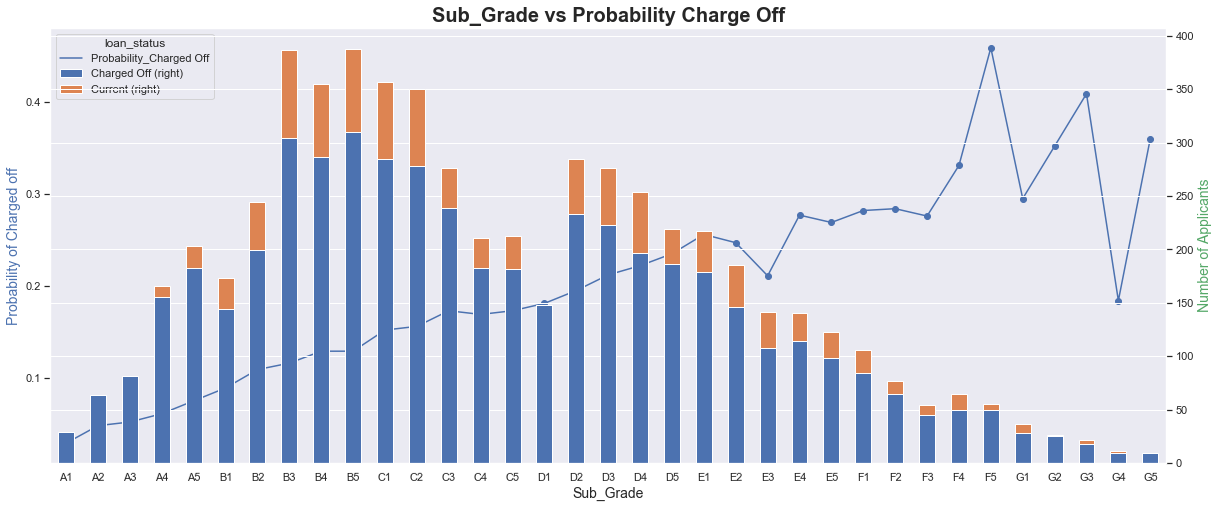

In [76]:
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False)
bivariate_prob(df =loan,col ='sub_grade')

As we move from Grade A to G, probability that person will charged off is increasing.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,,
0-25000,386,19,1705,2110,0.1830
25000-50000,1864,285,9531,11680,0.1600
50000-75000,1523,326,9036,10885,0.1400
75000-100000,669,198,4816,4974,0.1340
100000 and above,496,179,4299,5683,0.0870


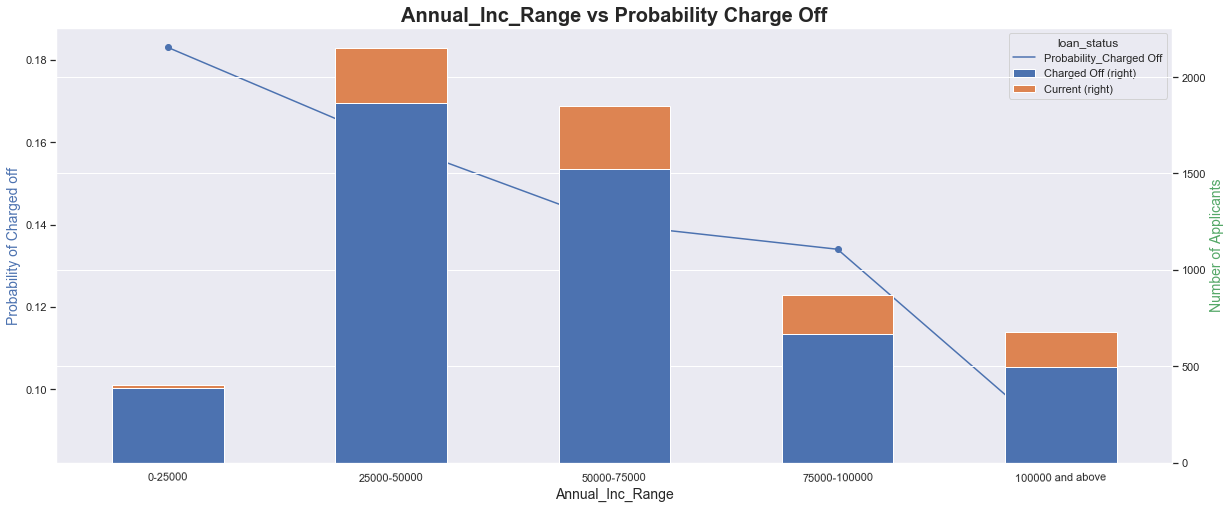

In [77]:
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range')

As the annual income is decreasing the probability 
that person will default is increasing with highest
of 18% at (0 to 25000) salary bracket.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
0,189,34,681,904,0.2090
1 year,395,65,2378,2838,0.1390
10+ years,1171,359,6377,7907,0.1480
2 years,485,88,3330,3903,0.1240
3 years,485,67,3111,3663,0.1320
4 years,403,83,2601,3087,0.1310
5 years,413,77,2456,2946,0.1400
6 years,276,53,1693,2022,0.1360
7 years,232,54,1297,1583,0.1470


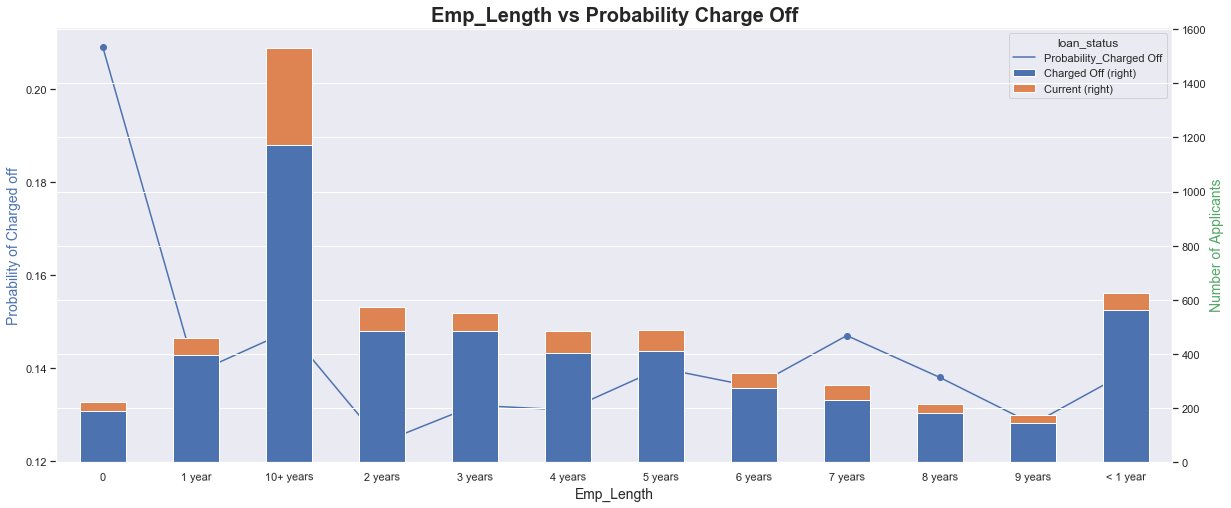

In [79]:
emp_length = crosstab(loan,'emp_length')
display(emp_length)

bivariate_prob(df =loan,col ='emp_length')

Applicants who are self employed & less than 1 year of experience are more probable of charged off.. 

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,224,5,4580,6902,0.0320
7.5-10,480,59,5649,8551,0.0560
10-12.5,1086,238,7227,4809,0.2260
12.5-15,1286,231,6577,8094,0.1590
15 and above,1592,387,4923,6188,0.2570


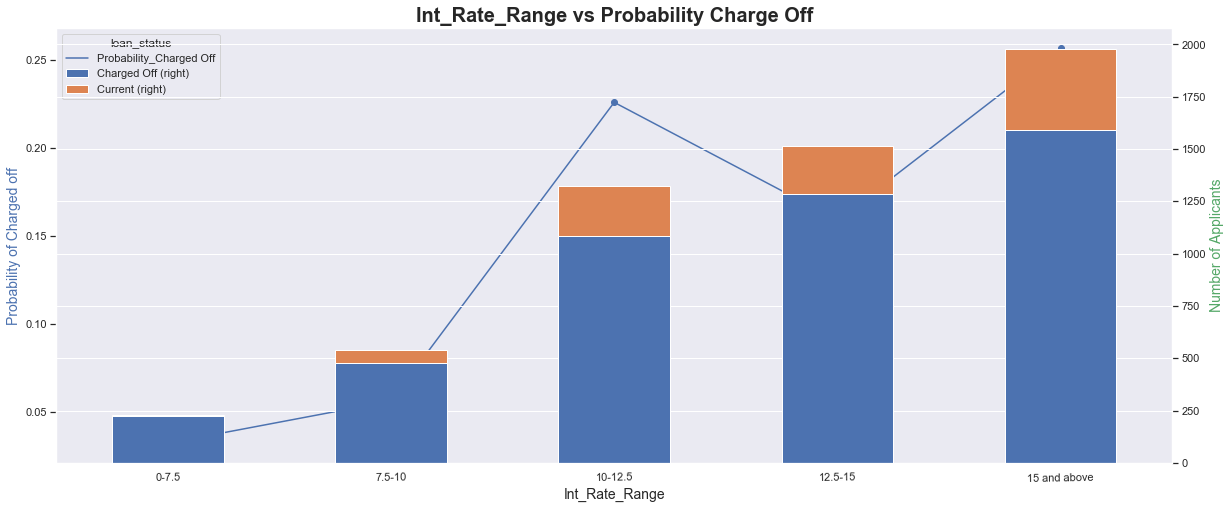

In [86]:
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range')

interest rate of 15% or above shows around 25% chance of charged off 
with 22.5% chances with interest rate of 10-12.5%

Top-5 Major variables to consider for loan prediction:

    1.Purpose of Loan
    2.Employment Length
    3.Grade
    4.Interest Rate
    5.Term